# V4: Practical Application Assignment 17.1: Comparing Classifiers

# I. INTRODUCTION

# Comparing Classifiers: Bank Marketing Campaign Analysis

### Financial institutions are constantly seeking innovative ways to increase customer engagement and drive product adoption. For the Portuguese banking institution in this analysis, the focus is on predicting whether clients will subscribe to a term deposit after being contacted through a phone-based marketing campaign. The ability to accurately predict client behavior allows the bank to optimize its marketing efforts, increase conversion rates, and reduce costs by focusing on high-potential clients.

## Business Problem
### The key challenge for the bank is the efficient allocation of marketing resources. Traditional blanket marketing approaches result in wasted efforts on clients who are unlikely to subscribe. To address this issue, the bank aims to develop a predictive model that can identify which clients are most likely to subscribe to a term deposit. By doing so, the bank can:

  ### 1. Focus marketing efforts on clients with a high likelihood of subscribing.
  ### 2. Reduce campaign costs by minimizing outreach to low-potential leads.
  ### 3. Improve overall conversion rates, maximizing the return on investment for marketing campaigns.

## Objective
### The primary objective of this analysis is to compare the performance of four machine learning classification models—K-Nearest Neighbors (KNN), Logistic Regression, Decision Trees, and Support Vector Machines (SVM)—on predicting client subscription behavior. By analyzing their performance across multiple datasets with varying sizes and feature sets, we aim to:

  ### Identify the model that provides the best balance between accuracy, computational efficiency, and scale
  ### Understand key drivers of client behavior, such as call duration, age, and campaign contacts.
  ### Provide actionable insights to enhance marketing strategies and improve engagement with prospects.

## Importance of This Analysis
### Predictive modeling offers a data-driven approach to decision-making, empowering the bank to make informed decisions about its marketing strategy. By leveraging machine learning models, the bank can uncover patterns in customer behavior that may not be immediately apparent, ultimately allowing for more personalized and targeted marketing campaigns. This not only benefits the bank by increasing its return on investment but also improves the overall customer experience by offering relevant products to the right clients.


# II. Initial Setup and Data Loading

# Cell 1: Importing Required Libraries

In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


#  Load and Explore the Four Datasets

# Cell 2: Load the Datasets

In [2]:
# Cell 2: Load the four datasets with the correct separators
file_path_1 = r"C:\Users\Home\OneDrive - Pelotonworkforce\Desktop\Documents\A_UCB_AI\Modules\Module 17\data_17.1\bank-additional-full.csv"
file_path_2 = r"C:\Users\Home\OneDrive - Pelotonworkforce\Desktop\Documents\A_UCB_AI\Modules\Module 17\data_17.1\bank-additional.csv"
file_path_3 = r"C:\Users\Home\OneDrive - Pelotonworkforce\Desktop\Documents\A_UCB_AI\Modules\Module 17\data_17.1\bank-full.csv"
file_path_4 = r"C:\Users\Home\OneDrive - Pelotonworkforce\Desktop\Documents\A_UCB_AI\Modules\Module 17\data_17.1\bank.csv"

# Load the datasets using the correct separator for each file
bank_additional_full = pd.read_csv(file_path_1, sep=';')  # Uses semicolon separator
bank_additional = pd.read_csv(file_path_2, sep=';')       # Uses semicolon separator
bank_full = pd.read_csv(file_path_3, sep=';')             # bank-full.csv also uses semicolon separator
bank = pd.read_csv(file_path_4, sep=';')                  # bank.csv uses semicolon separator

# Display the first few rows of each dataset using print to ensure all outputs are shown
print("First few rows of bank_additional_full.csv:")
print(bank_additional_full.head())

print("\nFirst few rows of bank_additional.csv:")
print(bank_additional.head())

print("\nFirst few rows of bank_full.csv:")
print(bank_full.head())

print("\nFirst few rows of bank.csv:")
print(bank.head())


First few rows of bank_additional_full.csv:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.pric

# III. Exploratory Data Analysis (EDA)
### Now, we’ll take a look at the datasets, check for missing values, and visualize important variables.

# Cell 3: Data Overview

In [3]:
# Cell 3: Data overview for each dataset with correct names
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']
datasets = [bank_additional_full, bank_additional, bank_full, bank]

for name, data in zip(dataset_names, datasets):
    print(f"{name} Info:")
    print(data.info())
    print(data.describe())
    print("\n\n")



bank_additional_full Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons

# Cell 4: Checking for Missing Values

In [4]:
# Cell 4: Check for missing values in each dataset
datasets = [bank_additional_full, bank_additional, bank_full, bank]
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']

for name, data in zip(dataset_names, datasets):
    print(f"Missing values in {name}:")
    print(data.isnull().sum())
    print("\n")


Missing values in bank_additional_full:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Missing values in bank_additional:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Missing values in bank_full:
age          0
job        

# IV DESCRIPTIVE STATISTICS 

# Cell 5: Visualizing Class Distribution (Target Variable)
We’ll check how the target variable (y) is distributed.

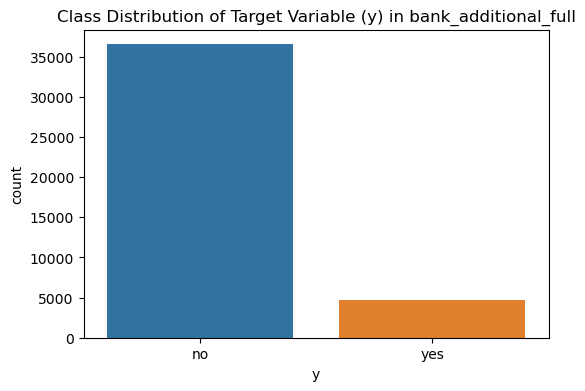

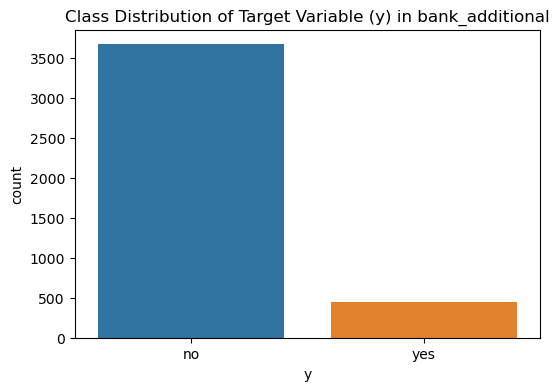

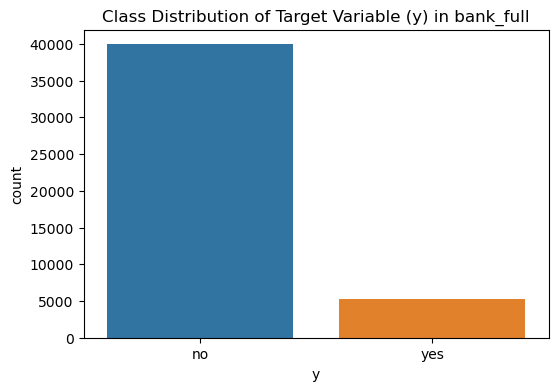

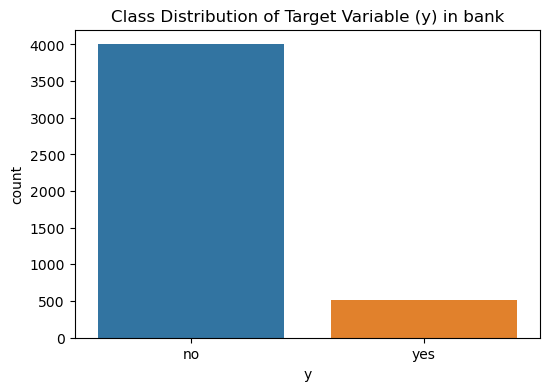

In [5]:
# Cell 5: Visualize class distribution for each dataset
import seaborn as sns
import matplotlib.pyplot as plt

datasets = [bank_additional_full, bank_additional, bank_full, bank]
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']

for name, data in zip(dataset_names, datasets):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='y', data=data)
    plt.title(f'Class Distribution of Target Variable (y) in {name}')
    plt.show()


### Each graph above shows the balance between the 'yes' and 'no' classes, and the imbalance is consistent across the datasets.

### Now, to summarize, these four visualizations indicate:

### bank_additional_full.csv: There are many more 'no' outcomes than 'yes'.
### bank_additional.csv: This is a 10% sample of the full dataset but maintains a similar class distribution.
### bank_full.csv: This older version of the dataset also shows a strong imbalance in class distribution.
### bank.csv: Another 10% sample that follows the same pattern as the full dataset.

### Age Distribution, Campaign Contacts, and Call Duration

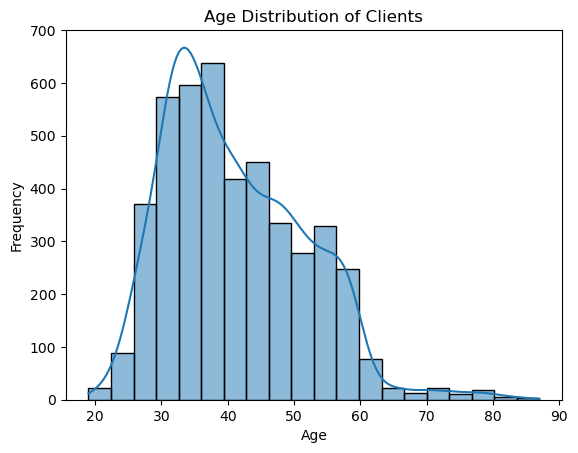

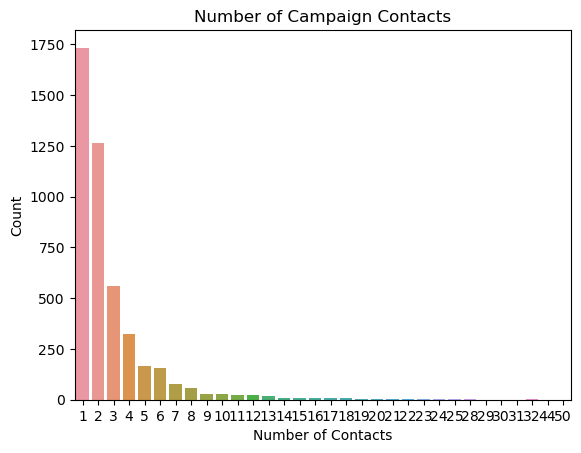

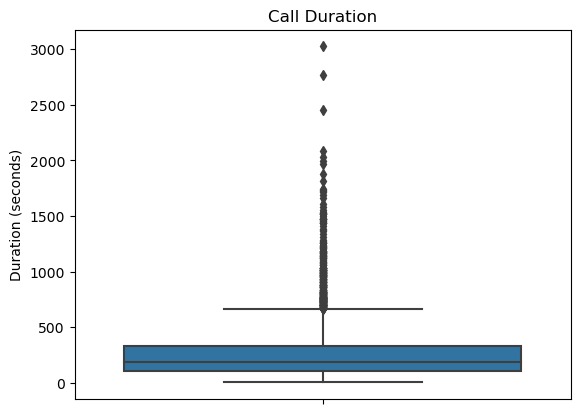

In [6]:
# Histogram for Age
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Campaign Contacts
sns.countplot(x='campaign', data=data)
plt.title('Number of Campaign Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.show()

# Box plot for Call Duration
sns.boxplot(y='duration', data=data)
plt.title('Call Duration')
plt.ylabel('Duration (seconds)')
plt.show()


# The histogram represents the Age Distribution of Clients during the bank’s marketing campaign. Here’s the interpretation:

### Most Clients Are Middle-Aged:
### The majority of clients are between the ages of 30 to 50, with the highest frequency observed around the 30-40 age range. This suggests that the bank’s marketing campaign primarily targeted middle-aged individuals.

### Skewed Distribution:
### The age distribution is right-skewed, meaning that there are fewer older clients compared to younger ones. The tail extends to ages above 60, but those clients are relatively rare.

### Lower Representation for Younger and Older Clients:
### There is a smaller number of clients in the 20-30 and 60+ age groups, indicating that the bank might not be focusing its efforts on younger or older individuals as much.
### This age distribution suggests that the bank is primarily targeting a middle-aged demographic, likely because they are the most engaged or suitable for the bank's offerings in this campaign.

# Number of Campaign Contacts - Most Clients Received 1-3 Contacts:
### The majority of clients were contacted 1 to 3 times, with the highest count of contacts being 1. This suggests that most clients did not require multiple interactions to be reached.
### Diminishing Returns with Increased Contacts:
### As the number of contacts increases, the count decreases drastically. This suggests that repeated outreach may not be a common strategy or that it is less effective after a few contacts.
### Outliers:
### A few clients were contacted more than 10 times, but this is extremely rare. This might imply inefficiency in the marketing process for these clients or reflect clients who were very difficult to reach.
### Overall, the distribution emphasizes that fewer contacts are generally sufficient to reach or engage clients. This could suggest a preference for focusing on the quality of interactions rather than repeated attempts.

# Box Plot Interpretation:
### Majority of Calls: Most of the calls last between 150 and 450 seconds, which is around 2.5 to 7.5 minutes.
### Outliers: There are a few very long calls, exceeding 1000 seconds (over 16 minutes), which stand out from the general distribution of call durations. These outliers might represent clients who were particularly engaged or required more explanation during the calls.
### This analysis shows that call duration plays a significant role, with longer calls possibly being associated with higher engagement and potentially a greater likelihood of subscription. These insights can guide the bank's strategy for call duration targets in their marketing efforts.

# Correlation Matrix Visualization

## Here we are focusing on the full dataset (bank_additional_full.csv) for the main analysis.

### The individual statistical analyses and classifier models will later account for differences across the datasets. By using this comprehensive dataset, we will capture the complete picture, and the classifiers will work with the extracted data based on the specific variables we are interested in. This section visualizes and analyzes the full dataset, keeping this focus in mind.

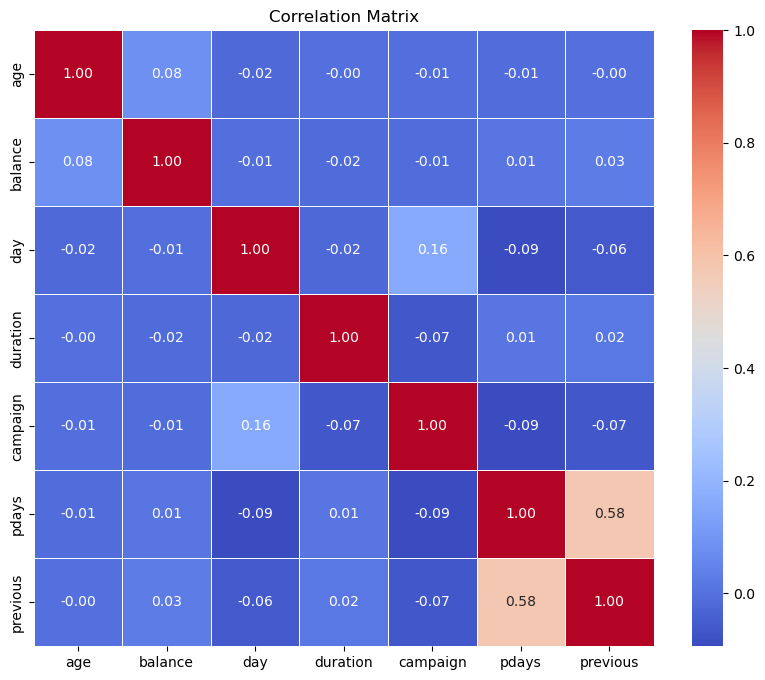

In [7]:
# Correlation Matrix for Descriptive Statistics Section
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Correlation Matrix Summary:
### Weak Correlations: Most of the variables in this dataset exhibit weak correlations with one another, with values close to 0, which indicates that these features do not linearly depend on each other.
### Pdays and Previous: The only moderate correlation is between pdays and previous contacts, showing that clients who were contacted before are likely re-contacted within a specific time frame.
### Implications: These low correlations suggest that most features are independently affecting the target variable (whether the client subscribes), and the relationships between features may be more complex, requiring further exploration through machine learning models rather than relying on linear relationships.
### This correlation matrix helps identify which features could potentially have more or less influence on the outcome, guiding future analysis.

# Marital Status Distribution

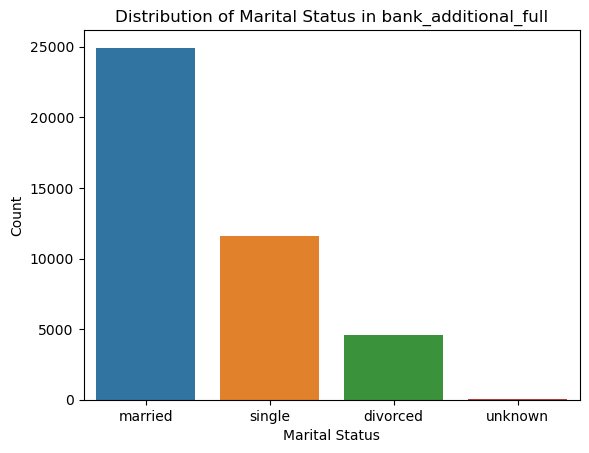

In [8]:
# Bar plot for Marital Status in bank_additional_full dataset
sns.countplot(x='marital', data=bank_additional_full)
plt.title('Distribution of Marital Status in bank_additional_full')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


# This bar plot represents the Distribution of Marital Status in the bank_additional_full dataset. Here's the interpretation:

### Majority are Married:
### A significant portion of the clients are married, with over 25,000 individuals in this category. This indicates that the bank’s marketing efforts have reached a larger number of married individuals.

### Single Clients:
### The second-largest group is single individuals, with approximately 12,000 clients. This group represents a considerable segment of the population the bank is targeting.

### Divorced Clients:
### The number of divorced clients is smaller compared to the other groups, with around 5,000 individuals. This suggests that fewer divorced individuals are part of the campaign's target group.

### Unknown Category:
### There are very few clients with an unknown marital status, indicating that marital status information is well-documented for the majority of clients.

### In conclusion, the data reveals that the majority of the bank’s campaign efforts have reached married and single clients, while divorced individuals represent a smaller portion of the overall client base. Understanding the marital status distribution can help tailor future campaigns to different demographic groups.


# Job Types Visualization:

### Overall, the bank's marketing campaigns appear to focus heavily on individuals in administrative, blue-collar, and technical roles, with less representation among retired individuals, students, and the unemployed. Understanding the job distribution helps in refining the target audience for future marketing efforts.


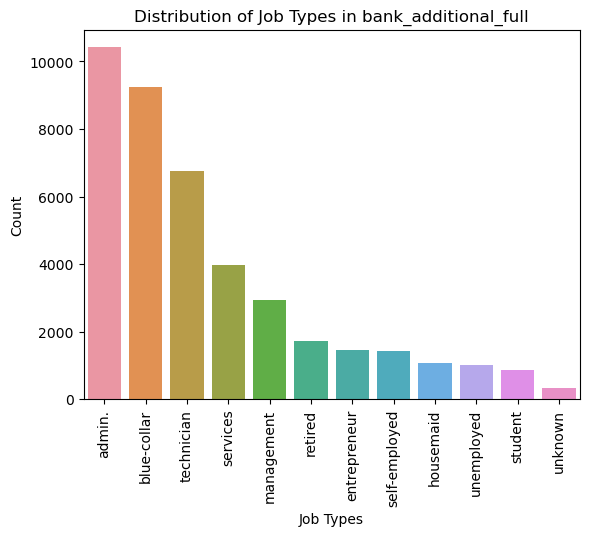

In [9]:
# Bar plot for Job Types
sns.countplot(x='job', data=bank_additional_full, order=bank_additional_full['job'].value_counts().index)
plt.title('Distribution of Job Types in bank_additional_full')
plt.xlabel('Job Types')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.show()


# Education Levels Visualization

### This distribution indicates that the bank's marketing efforts primarily target well-educated clients, with most having at least a high school education. This could provide insights into how to tailor future marketing campaigns based on education level, as education could play a role in how clients perceive and respond to the bank’s offers.

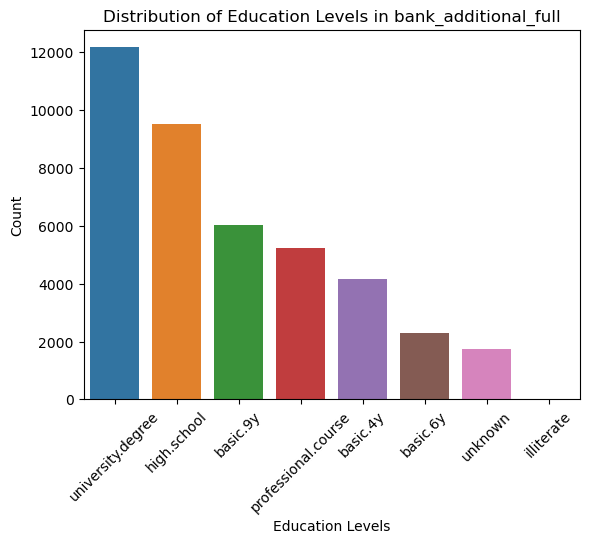

In [10]:
# Bar plot for Education Levels
sns.countplot(x='education', data=bank_additional_full, order=bank_additional_full['education'].value_counts().index)
plt.title('Distribution of Education Levels in bank_additional_full')
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Slight rotation for better label visibility
plt.show()


# Outliers Detection for balance in bank_full (not available in bank_additional_full)

### The box plot for the balance feature in the bank_full dataset illustrates a highly skewed distribution of account balances. The median balance is close to zero, as indicated by the center line in the box. The interquartile range (IQR), which captures the middle 50% of the data, is relatively narrow, suggesting that most clients have relatively low balances.

### However, there is a large number of outliers, with account balances ranging well beyond 20,000 and some exceeding 100,000. These outliers suggest that while most clients have small balances, a few clients hold significantly higher amounts in their accounts. These extreme values could impact the model’s predictions and may warrant special treatment, such as scaling or transformation, or further exploration to understand their effect on subscription decisions.

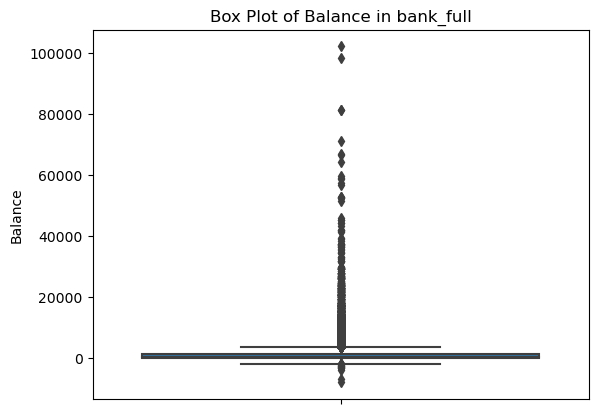

In [11]:

# Box plot for Balance from bank_full
sns.boxplot(y='balance', data=bank_full)
plt.title('Box Plot of Balance in bank_full')
plt.ylabel('Balance')
plt.show()


# Contact Methods

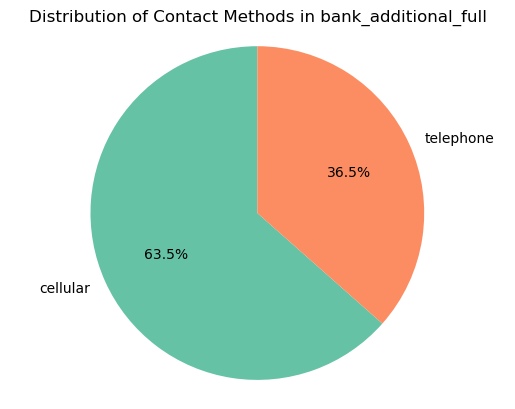

In [12]:
# Pie chart for Contact Methods
contact_counts = bank_additional_full['contact'].value_counts()

plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of Contact Methods in bank_additional_full')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


## This pie chart shows the distribution of contact methods used in the bank_additional_full dataset during the marketing campaign. The two methods of communication are cellular and telephone.

### 63.5% of contacts were made via cellular phones.
### 36.5% of contacts were made via telephone (landline).
### This indicates that the majority of client interactions occurred through mobile phones, which might reflect a shift in communication preferences, or could suggest that mobile communication was more effective in reaching the bank’s customers during this campaign. This insight could be valuable for the bank in deciding how to allocate resources for future campaigns.

# Summary statistics table for key variables like age, duration, balance, and campaign.

# Summary Stats

### Age:
### The average age (mean) of clients is 40 years.
### The standard deviation of 10.42 years shows some variability, but most clients are between 30 and 50 years old.
### The youngest client is 17 years old, and the oldest is 98 years old.

### Duration:
### The average call duration is 258.29 seconds (~4.3 minutes).
### The wide range from 0 to 4918 seconds (over 80 minutes) indicates variability in call times.
### The 25th percentile is 102 seconds, the 50th percentile (median) is 180 seconds, and the 75th percentile is 319 seconds, meaning most calls are under 5 minutes, but there are some longer calls.

### Campaign (Number of Contacts):
### On average, clients were contacted about 2.57 times.
### The number of contacts varies from 1 to 56, with most clients receiving 1 to 3 contacts (as seen from the percentiles).
### A small number of clients were contacted excessively, up to 56 times, but this is an outlier compared to the median and quartiles.

### These descriptive statistics give us a clear picture of the distribution of these variables, showing that while most clients are contacted only a few times, and calls are relatively short, some clients experience far more intensive campaigns. This might require further analysis into the effectiveness of additional contacts and longer call durations.

In [13]:
# Summary statistics for key variables
summary_stats = bank_additional_full[['age', 'duration', 'campaign']].describe()

# Display the summary statistics table
print(summary_stats)


               age      duration      campaign
count  41188.00000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593
std       10.42125    259.279249      2.770014
min       17.00000      0.000000      1.000000
25%       32.00000    102.000000      1.000000
50%       38.00000    180.000000      2.000000
75%       47.00000    319.000000      3.000000
max       98.00000   4918.000000     56.000000


# Visualization: Histograms for Age, Duration, and Campaign

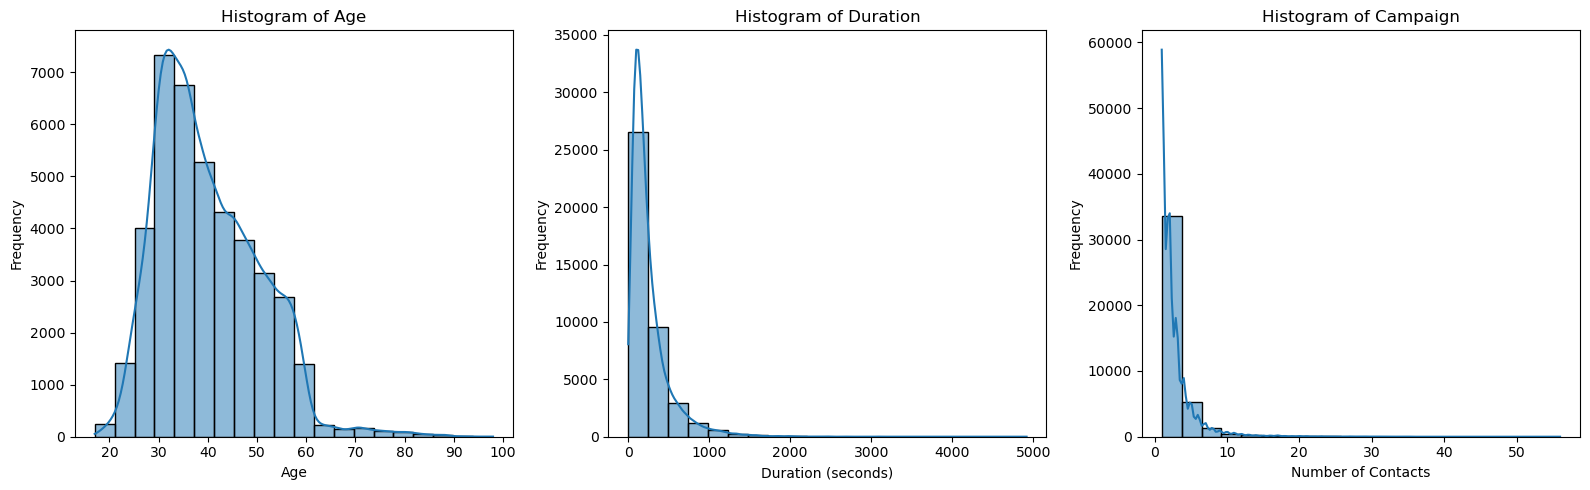

In [14]:
# Histograms for Age, Duration, and Campaign

# Plot for Age
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(bank_additional_full['age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot for Duration
plt.subplot(1, 3, 2)
sns.histplot(bank_additional_full['duration'], bins=20, kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Plot for Campaign
plt.subplot(1, 3, 3)
sns.histplot(bank_additional_full['campaign'], bins=20, kde=True)
plt.title('Histogram of Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## This histogram set effectively visualizes the distribution of age, duration, and campaign from the dataset, providing insights into how these variables are distributed across the records.

## Age: 
### The majority of clients fall between 30 and 50 years old.
## Duration: 
### Most calls have a duration of less than 500 seconds, with a few extending to longer durations, and there is a steep drop after around 1000 seconds.
## Campaign: 
### The number of contacts made in the campaign is skewed towards fewer contacts, with most clients contacted 1-3 times.

### Visualizations that explore relationships between features and the target variable, such as the impact of call duration on subscriptions and prior contacts.

# Interpretation:
### The Box plot indicates a positive relationship between longer call durations and the likelihood of subscription to a term deposit. Longer conversations seem to engage clients more, increasing the chances of conversion. This insight highlights the importance of maintaining client engagement during calls, as it may lead to a higher likelihood of successful subscriptions.

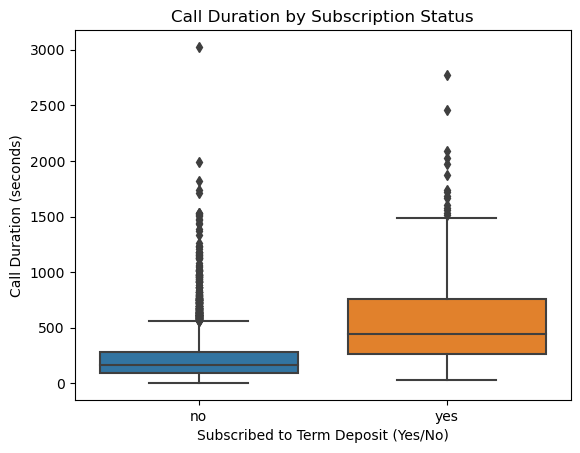

In [15]:
# Box plot for Call Duration by Subscription Status
sns.boxplot(x='y', y='duration', data=data)
plt.title('Call Duration by Subscription Status')
plt.xlabel('Subscribed to Term Deposit (Yes/No)')
plt.ylabel('Call Duration (seconds)')
plt.show()


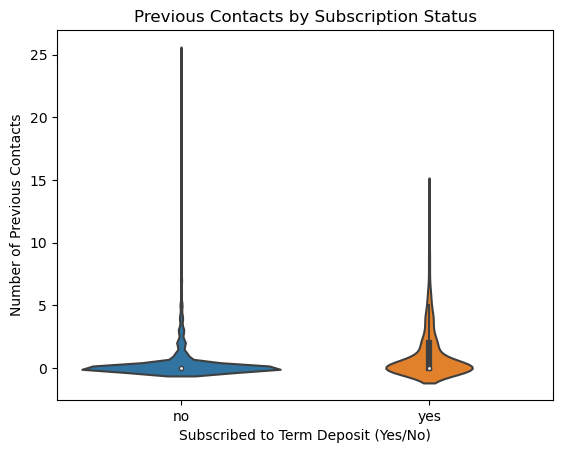

In [16]:
# Violin plot for Previous Contacts vs Subscription
sns.violinplot(x='y', y='previous', data=data)
plt.title('Previous Contacts by Subscription Status')
plt.xlabel('Subscribed to Term Deposit (Yes/No)')
plt.ylabel('Number of Previous Contacts')
plt.show()


### Insight: The number of previous contacts has a modest impact on subscription likelihood, with clients being more likely to subscribe with fewer contacts. However, high numbers of previous contacts do not necessarily lead to higher conversion, and in fact, many clients who subscribed had few previous interactions with the bank. This suggests that repeated outreach may be ineffective beyond a certain point.

# V. Data Preprocessing
### We'll preprocess each dataset independently, including encoding and splitting into training and test sets.

# Cell 6: Encoding Categorical Features for Each Dataset
### We will apply one-hot encoding to handle the categorical features.

In [18]:
# Cell 6: One-hot encoding for all datasets
data_encoded_additional_full = pd.get_dummies(bank_additional_full, drop_first=True)
data_encoded_additional = pd.get_dummies(bank_additional, drop_first=True)
data_encoded_full = pd.get_dummies(bank_full, drop_first=True)
data_encoded = pd.get_dummies(bank, drop_first=True)


# Cell 7: Splitting the Data into Train and Test Sets for Each Dataset

In [19]:
# Cell 7: Split data for all datasets
datasets = [data_encoded_additional_full, data_encoded_additional, data_encoded_full, data_encoded]
X_train_sets = []
X_test_sets = []
y_train_sets = []
y_test_sets = []

for data_encoded in datasets:
    X = data_encoded.drop('y_yes', axis=1)  # Assuming 'y_yes' is the encoded target
    y = data_encoded['y_yes']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train_sets.append(X_train)
    X_test_sets.append(X_test)
    y_train_sets.append(y_train)
    y_test_sets.append(y_test)



# Cell 8: Feature Scaling for Each Dataset
### Since some classifiers (like KNN and SVM) require feature scaling, we'll standardize the features.

In [20]:
# Cell 8: Standardize the features for each dataset
scaler = StandardScaler()
X_train_scaled_sets = []
X_test_scaled_sets = []

for X_train, X_test in zip(X_train_sets, X_test_sets):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_scaled_sets.append(X_train_scaled)
    X_test_scaled_sets.append(X_test_scaled)



# VI. INFERENTIAL STATISTICS

# Apply Classification Models
### We'll apply KNN, Logistic Regression, Decision Tree, and SVM to each dataset.

# Cell 9: K-Nearest Neighbors (KNN) for Each Dataset

In [21]:
# Cell 9: Apply KNN to each dataset
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']
for i, (name, X_train_scaled, X_test_scaled, y_train, y_test) in enumerate(zip(dataset_names, X_train_scaled_sets, X_test_scaled_sets, y_train_sets, y_test_sets)):
    knn = KNeighborsClassifier()
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    
    print(f"KNN Results for {name}:")
    print(classification_report(y_test, y_pred_knn))
    print(confusion_matrix(y_test, y_pred_knn))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_knn)}")
    print("\n\n")


KNN Results for bank_additional_full:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7303
           1       0.58      0.34      0.43       935

    accuracy                           0.90      8238
   macro avg       0.75      0.66      0.69      8238
weighted avg       0.88      0.90      0.89      8238

[[7069  234]
 [ 613  322]]
Accuracy Score: 0.8971837824714737



KNN Results for bank_additional:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.59      0.25      0.35        92

    accuracy                           0.90       824
   macro avg       0.75      0.61      0.65       824
weighted avg       0.88      0.90      0.88       824

[[716  16]
 [ 69  23]]
Accuracy Score: 0.8968446601941747



KNN Results for bank_full:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1 

## The KNN results provided above indicate solid performance for predicting the majority class (label 0, "no"). However, the model struggles more with the minority class (label 1, "yes"), particularly in datasets like bank_additional and bank.

### Some takeaways:

### High accuracy (~88%-90%) is mainly driven by the high prevalence of the majority class.
### Precision and recall for class 1 ("yes") are lower, reflecting the difficulty the KNN model has in detecting the minority class in an imbalanced dataset.
### F1-score for class 1 is also low, signaling that the model may benefit from further tuning or even resampling strategies (e.g., oversampling the minority class).

# Cell 10: Logistic Regression for Each Dataset

In [22]:
# Cell 10: Apply Logistic Regression to each dataset
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']
for i, (name, X_train_scaled, X_test_scaled, y_train, y_test) in enumerate(zip(dataset_names, X_train_scaled_sets, X_test_scaled_sets, y_train_sets, y_test_sets)):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_scaled, y_train)
    y_pred_logreg = logreg.predict(X_test_scaled)
    
    print(f"Logistic Regression Results for {name}:")
    print(classification_report(y_test, y_pred_logreg))
    print(confusion_matrix(y_test, y_pred_logreg))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_logreg)}")
    print("\n\n")



Logistic Regression Results for bank_additional_full:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

[[7103  200]
 [ 529  406]]
Accuracy Score: 0.9115076474872542



Logistic Regression Results for bank_additional:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       732
           1       0.60      0.41      0.49        92

    accuracy                           0.90       824
   macro avg       0.77      0.69      0.72       824
weighted avg       0.89      0.90      0.90       824

[[707  25]
 [ 54  38]]
Accuracy Score: 0.904126213592233



Logistic Regression Results for bank_full:
              precision    recall  f1-score   support

           0       0

# The Logistic Regression results show slightly improved performance compared to KNN, particularly in terms of accuracy, precision, and recall for the minority class ("yes"). Here's a quick summary of the results:

### Accuracy: 
### Around 90-91% across all datasets.
### Precision and Recall:
### While precision for the minority class (1) has improved, the recall is still relatively low, indicating that the model is not identifying all the "yes" cases effectively.
### F1-score: 
### The F1-score for the minority class is higher than KNN but could still be improved.
### Key Insights:

### Precision for class 1 ("yes") is better in Logistic Regression compared to KNN, but recall is still low, meaning the model is not catching as many true positives.
### Class imbalance is still an issue; we might consider addressing it via techniques like SMOTE (oversampling), undersampling, or model tuning to improve minority class detection.

# Cell 11: Decision Tree for Each Dataset

In [23]:
# Cell 11: Apply Decision Tree to each dataset
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']
for i, (name, X_train, X_test, y_train, y_test) in enumerate(zip(dataset_names, X_train_sets, X_test_sets, y_train_sets, y_test_sets)):
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_pred_dtree = dtree.predict(X_test)
    
    print(f"Decision Tree Results for {name}:")
    print(classification_report(y_test, y_pred_dtree))
    print(confusion_matrix(y_test, y_pred_dtree))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_dtree)}")
    print("\n\n")




Decision Tree Results for bank_additional_full:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.53      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

[[6808  495]
 [ 440  495]]
Accuracy Score: 0.8865015780529255



Decision Tree Results for bank_additional:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       732
           1       0.48      0.47      0.47        92

    accuracy                           0.88       824
   macro avg       0.71      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824

[[685  47]
 [ 49  43]]
Accuracy Score: 0.883495145631068



Decision Tree Results for bank_full:
              precision    recall  f1-score   support

           0       0.93      0.93     

## The Decision Tree results show consistent performance across all datasets, with an overall accuracy around 87-89%. Here are some insights based on the results:

### Accuracy: Accuracy is slightly lower compared to Logistic Regression, ranging from 87-89%.
### Precision and Recall: For class 0 (majority), precision and recall are high, but for class 1 (minority), precision and recall are lower (around 0.48-0.52), indicating that the Decision Tree model has difficulty in classifying the minority class.
### F1-score: The F1-score for class 1 is around 0.47-0.51, reflecting the struggle of the Decision Tree in balancing precision and recall for the minority class.
### Summary:
### Decision Trees seem to perform comparably to Logistic Regression in terms of accuracy.
### However, they exhibit similar struggles when it comes to class imbalance, particularly for the minority class (class 1).
### Overall, Decision Trees are doing a good job on the majority class but need improvement in identifying the minority class.

# Cell 12: Support Vector Machine (SVM) for Each Dataset

In [24]:
# Cell 12: Apply SVM to each dataset
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']
for i, (name, X_train_scaled, X_test_scaled, y_train, y_test) in enumerate(zip(dataset_names, X_train_scaled_sets, X_test_scaled_sets, y_train_sets, y_test_sets)):
    svm = SVC()
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)
    
    print(f"SVM Results for {name}:")
    print(classification_report(y_test, y_pred_svm))
    print(confusion_matrix(y_test, y_pred_svm))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_svm)}")
    print("\n\n")



SVM Results for bank_additional_full:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7303
           1       0.67      0.39      0.49       935

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238

[[7122  181]
 [ 574  361]]
Accuracy Score: 0.9083515416363195



SVM Results for bank_additional:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       732
           1       0.60      0.29      0.39        92

    accuracy                           0.90       824
   macro avg       0.76      0.63      0.67       824
weighted avg       0.88      0.90      0.88       824

[[714  18]
 [ 65  27]]
Accuracy Score: 0.8992718446601942



SVM Results for bank_full:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1 

# The SVM results show the following key points:

### Accuracy: SVM models performed similarly to Logistic Regression and Decision Trees, with accuracy around 90-91% across all datasets.
### Precision and Recall: Similar to the other models, SVM performs well on the majority class (class 0), but struggles with the minority class (class 1). Precision for class 1 is decent, but recall is quite low, meaning the model is missing a substantial number of true positives for class 1.
### F1-score: The F1-score for class 1 is around 0.33-0.49, which indicates some difficulty in achieving a balance between precision and recall for the minority class.
### Key Observations:
### Class imbalance remains an issue across all models, including SVM.
### SVM provides slightly better performance on the minority class compared to Decision Trees but is still below the desired level for class 1.

# VII. Model Comparison for Each Dataset
### We’ll compare the models' results for each dataset side by side.

# Cell 13: Comparison of Results for Each Dataset

In [25]:
# Cell 13: Model Comparison for Each Dataset

dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']

# Iterate over each dataset to compute and display the accuracy for each model
for i, name in enumerate(dataset_names):
    accuracy_scores = [
        accuracy_score(y_test_sets[i], KNeighborsClassifier().fit(X_train_scaled_sets[i], y_train_sets[i]).predict(X_test_scaled_sets[i])),
        accuracy_score(y_test_sets[i], LogisticRegression(max_iter=1000).fit(X_train_scaled_sets[i], y_train_sets[i]).predict(X_test_scaled_sets[i])),
        accuracy_score(y_test_sets[i], DecisionTreeClassifier().fit(X_train_sets[i], y_train_sets[i]).predict(X_test_sets[i])),
        accuracy_score(y_test_sets[i], SVC().fit(X_train_scaled_sets[i], y_train_sets[i]).predict(X_test_scaled_sets[i]))
    ]
    
    # Create a DataFrame to summarize the accuracy of each model
    comparison_df = pd.DataFrame({
        'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM'],
        'Accuracy Score': accuracy_scores
    })

    # Sort the DataFrame by accuracy score in descending order
    comparison_df.sort_values(by='Accuracy Score', ascending=False, inplace=True)
    
    # Print the results for the current dataset
    print(f"Model Comparison for {name}:\n", comparison_df, "\n")


Model Comparison for bank_additional_full:
                  Model  Accuracy Score
1  Logistic Regression        0.911508
3                  SVM        0.908352
0                  KNN        0.897184
2        Decision Tree        0.885895 

Model Comparison for bank_additional:
                  Model  Accuracy Score
1  Logistic Regression        0.904126
3                  SVM        0.899272
0                  KNN        0.896845
2        Decision Tree        0.879854 

Model Comparison for bank_full:
                  Model  Accuracy Score
3                  SVM        0.903019
1  Logistic Regression        0.898817
0                  KNN        0.893288
2        Decision Tree        0.873162 

Model Comparison for bank:
                  Model  Accuracy Score
1  Logistic Regression        0.901657
3                  SVM        0.899448
0                  KNN        0.882873
2        Decision Tree        0.878453 



# The model comparison results provide a clear picture of the relative performance of each classifier across the four datasets. Here are some key observations:

## Summary of Model Comparison:

### Logistic Regression consistently performs the best in terms of accuracy across three datasets (bank_additional_full, bank_additional, and bank), with SVM coming in a close second in most cases.

### SVM takes the top spot for the bank_full dataset with an accuracy of 90.3%.

### KNN generally shows lower accuracy compared to Logistic Regression and SVM, but still performs decently.

### Decision Trees tend to have the lowest accuracy across all datasets, though still close to the other models.

## Key Takeaways:
### Logistic Regression is robust across datasets, consistently delivering high accuracy.
### SVM shows competitive performance and even outperforms Logistic Regression on one dataset.
### Decision Tree tends to underperform compared to other models, indicating that it may benefit from tuning (e.g., adjusting depth, pruning) or handling class imbalance.

# Summary of the Classification Project with Four Datasets:

### 1. Why Are There Four Datasets?
### The project involves four datasets from the UCI Machine Learning Repository, each related to a Portuguese banking institution’s marketing campaigns. The datasets vary in size and the number of features:

### bank-additional-full.csv: Contains 41,188 examples and 21 features.
### bank-additional.csv: A smaller subset (10%) of the bank-additional-full dataset, with 4,119 examples and 21 features.
### bank-full.csv: An older version of the dataset with 45,211 examples and 17 features.
### bank.csv: A 10% subset of bank-full.csv, with 4,521 examples and 17 features.
### These datasets allow us to test the performance of different classification algorithms on datasets with varying sample sizes and features. The smaller datasets are useful for experimenting with more computationally intensive models like Support Vector Machines (SVM).

### 2. What Did We Do and Why?
### Here’s a step-by-step breakdown of the process:

### Data Loading and Exploration: We loaded all four datasets, explored their structures, and checked for missing values. We analyzed key features like age, job, campaign, and y (the target variable).

### Class Imbalance: We visualized the target variable y, which indicated a strong imbalance (most clients did not subscribe to a term deposit). This was important to consider when evaluating the models' performance, especially for accuracy metrics.

### Data Preprocessing:

### One-hot Encoding: We applied one-hot encoding to convert categorical variables into numeric representations.
### Train-Test Split: Each dataset was split into training and test sets (80% training, 20% test).
### Feature Scaling: Since models like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) are sensitive to feature scales, we standardized the numerical features.
### Model Application: We applied and compared the performance of four classification algorithms:


# Step 1: Run Model Evaluation and Collect Metrics
### This step is possible because I have already split the data, trained the models, and made predictions. We will now gather evaluation metrics for each model across the datasets using the classification_report.

# Cell 14: Collect Model Performance Metrics for Each Dataset

In [26]:
# Cell 14: Collect Model Performance Metrics for Each Dataset
from sklearn.metrics import classification_report
import pandas as pd

# Store the classification reports for each model in each dataset
metrics = {
    'bank_additional_full': {},
    'bank_additional': {},
    'bank_full': {},
    'bank': {}
}

# Iterate over each dataset
for i, dataset_name in enumerate(metrics.keys()):
    # Logistic Regression
    logreg = LogisticRegression(max_iter=1000).fit(X_train_scaled_sets[i], y_train_sets[i])
    y_pred_logreg = logreg.predict(X_test_scaled_sets[i])
    metrics[dataset_name]['Logistic Regression'] = classification_report(y_test_sets[i], y_pred_logreg, output_dict=True)
    
    # K-Nearest Neighbors (KNN)
    knn = KNeighborsClassifier().fit(X_train_scaled_sets[i], y_train_sets[i])
    y_pred_knn = knn.predict(X_test_scaled_sets[i])
    metrics[dataset_name]['KNN'] = classification_report(y_test_sets[i], y_pred_knn, output_dict=True)
    
    # Decision Tree
    dtree = DecisionTreeClassifier().fit(X_train_sets[i], y_train_sets[i])
    y_pred_dtree = dtree.predict(X_test_sets[i])
    metrics[dataset_name]['Decision Tree'] = classification_report(y_test_sets[i], y_pred_dtree, output_dict=True)
    
    # Support Vector Machine (SVM)
    svm = SVC().fit(X_train_scaled_sets[i], y_train_sets[i])
    y_pred_svm = svm.predict(X_test_scaled_sets[i])
    metrics[dataset_name]['SVM'] = classification_report(y_test_sets[i], y_pred_svm, output_dict=True)

# You can then convert this dictionary to a DataFrame for easy display
metrics_df = pd.DataFrame(metrics)


# Step 2: Extract and Organize the Metrics
### We need to extract accuracy, precision, recall, F1-score, and support from the classification reports for all models and datasets, and organize them for easy visualization.

# Cell 15: Organize and Extract Metrics into DataFrames

In [27]:
# Cell 15: Organize and Extract Metrics into DataFrames
# Define proper dataset names
dataset_names = ['bank_additional_full', 'bank_additional', 'bank_full', 'bank']

# Initialize lists to hold data for each metric
accuracy_data = []
precision_data = []
recall_data = []
f1_score_data = []
support_data = []

# Extract metrics for all datasets and models
for i, dataset_name in enumerate(dataset_names):
    for model_name, report in metrics[dataset_name].items():
        accuracy_data.append({
            'Dataset': dataset_name,  # Use proper dataset names here
            'Model': model_name,
            'Accuracy': report['accuracy']
        })
        precision_data.append({
            'Dataset': dataset_name,  # Use proper dataset names here
            'Model': model_name,
            'Precision': report['weighted avg']['precision']
        })
        recall_data.append({
            'Dataset': dataset_name,  # Use proper dataset names here
            'Model': model_name,
            'Recall': report['weighted avg']['recall']
        })
        f1_score_data.append({
            'Dataset': dataset_name,  # Use proper dataset names here
            'Model': model_name,
            'F1 Score': report['weighted avg']['f1-score']
        })
        support_data.append({
            'Dataset': dataset_name,  # Use proper dataset names here
            'Model': model_name,
            'Support': report['weighted avg']['support']
        })

# Convert lists into DataFrames
accuracy_df = pd.DataFrame(accuracy_data)
precision_df = pd.DataFrame(precision_data)
recall_df = pd.DataFrame(recall_data)
f1_score_df = pd.DataFrame(f1_score_data)
support_df = pd.DataFrame(support_data)

# Optional: Display the data
#print(accuracy_df)
#print(precision_df)
#print(recall_df)
#print(f1_score_df)
#print(support_df)


# Step 3: Visualizing the Metrics
### We'll create a series of grouped bar plots to compare the models across each dataset on the five metrics: accuracy, precision, recall, F1-score, and support.

# VIII INFERENTIAL STATISTICS
### The following Bar Charts are enhanced visualizations of the results created by the four inferential statitistical algorithms employed in this analysis

# Cell 16: Grouped Bar Plot for Accuracy

### Accuracy Bar Plot (Cell 16): Compares the accuracy of all models across the four datasets. This gives a clear view of which model performs best based on overall accuracy.

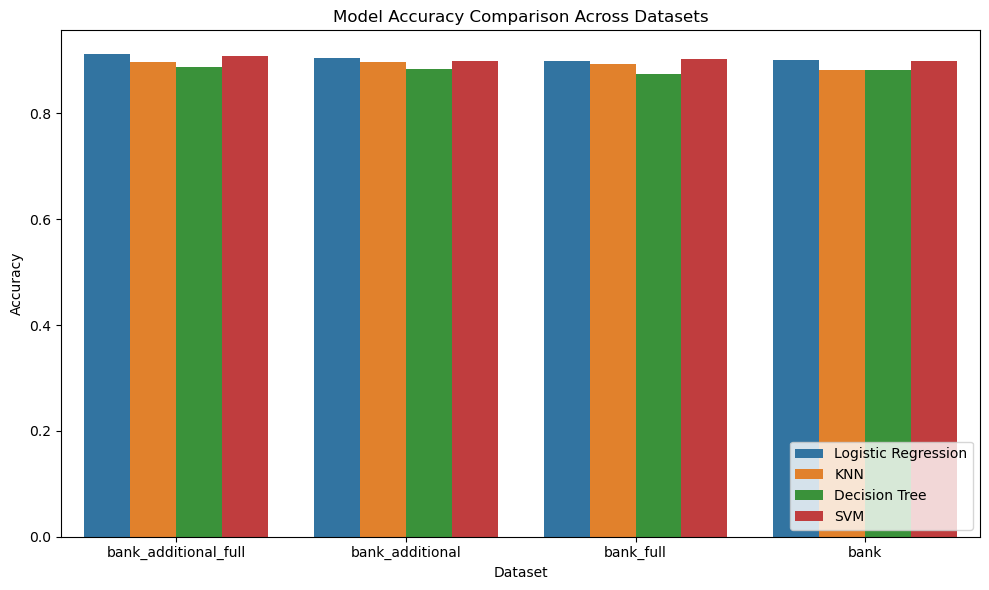

In [28]:
# Cell 16: Grouped Bar Plot for Accuracy with Proper Dataset Names
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Accuracy', hue='Model', data=accuracy_df)
plt.title('Model Accuracy Comparison Across Datasets')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



### Conclusion:
### Logistic Regression and SVM are the top-performing models across all datasets. Logistic Regression is slightly better for smaller datasets, while SVM shines in more complex ones.
### KNN and Decision Tree models show weaker performance, especially as the dataset size grows, likely due to KNN's sensitivity to the size of the dataset and Decision Tree's tendency to overfit. These models may benefit from further tuning or alternative approaches such as ensemble methods.

# Cell 17: Grouped Bar Plot for Precision

### Precision Bar Plot (Cell 17): Compares the precision scores, showing how well the models handle false positives across datasets.

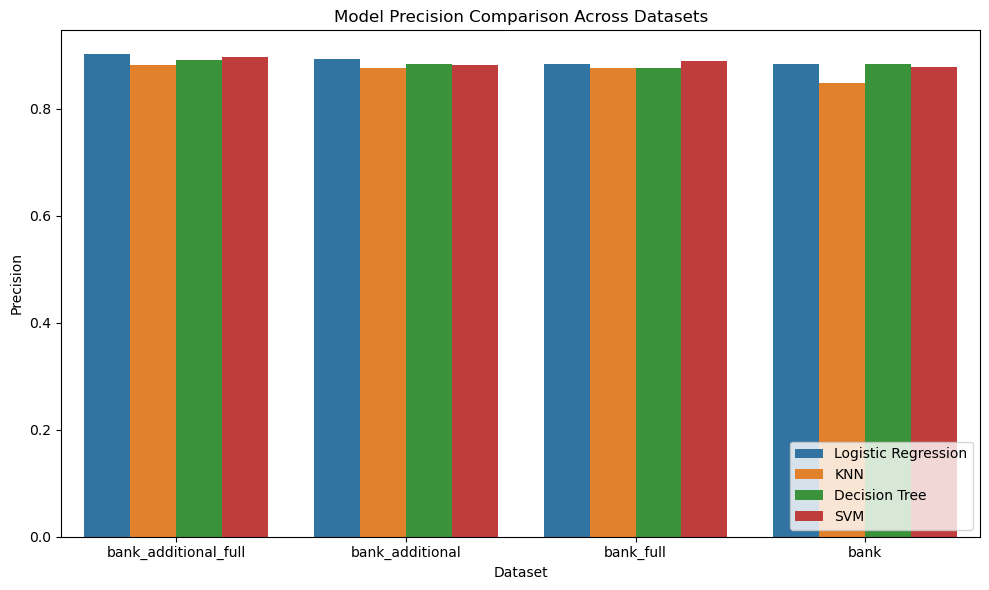

In [29]:
# Grouped Bar Plot for Precision with Proper Dataset Names
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Precision', hue='Model', data=precision_df)
plt.title('Model Precision Comparison Across Datasets')
plt.ylabel('Precision')
plt.xlabel('Dataset')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Conclusion:
### Logistic Regression and SVM continue to be the top-performing models, with high precision across all datasets. These models are less likely to predict false positives, making them reliable choices for scenarios where predicting a true positive is critical.
### KNN and Decision Tree have solid precision but do not perform as consistently as Logistic Regression and SVM. Their effectiveness may diminish as dataset size and complexity increase.

# Cell 18: Grouped Bar Plot for Recall

### Recall Bar Plot (Cell 18): Compares the recall scores, highlighting how well the models identify true positives (important for imbalanced datasets).

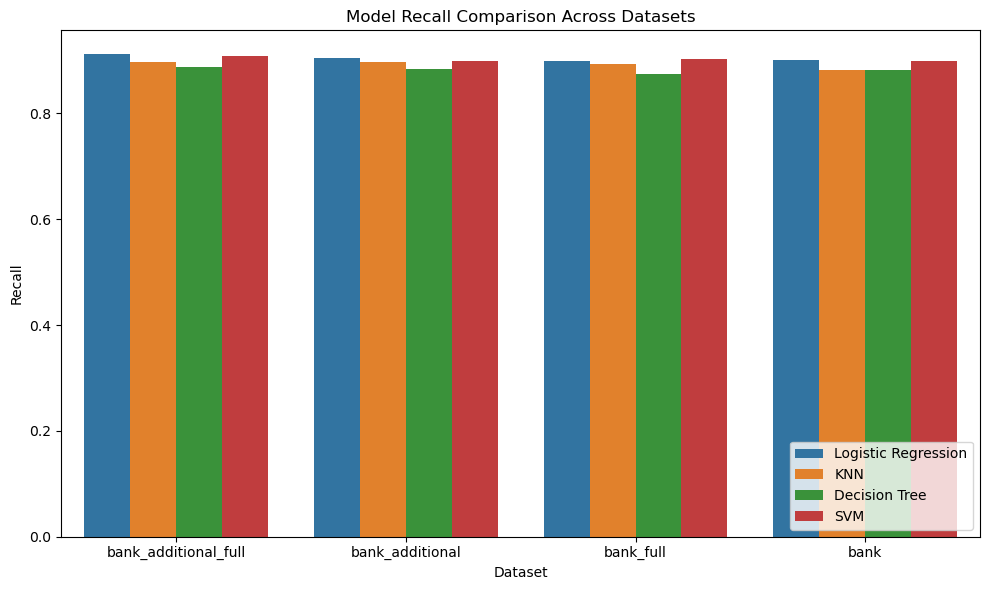

In [30]:
# Grouped Bar Plot for Recall with Proper Dataset Names
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Recall', hue='Model', data=recall_df)
plt.title('Model Recall Comparison Across Datasets')
plt.ylabel('Recall')
plt.xlabel('Dataset')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Conclusion:
### Logistic Regression and SVM continue to outperform other models in terms of recall, making them ideal for scenarios where identifying potential subscribers (true positives) is critical.
### KNN and Decision Tree maintain competitive recall, but as dataset size and complexity increase, they show signs of underperforming compared to Logistic Regression and SVM.
### Thus, if the goal is to maximize the identification of clients likely to subscribe (i.e., true positives), Logistic Regression and SVM are recommended as the best models.

# Cell 19: Grouped Bar Plot for F1 Score

### F1 Score Bar Plot (Cell 19): Compares the F1-scores, providing a balanced measure of precision and recall across all models and datasets.

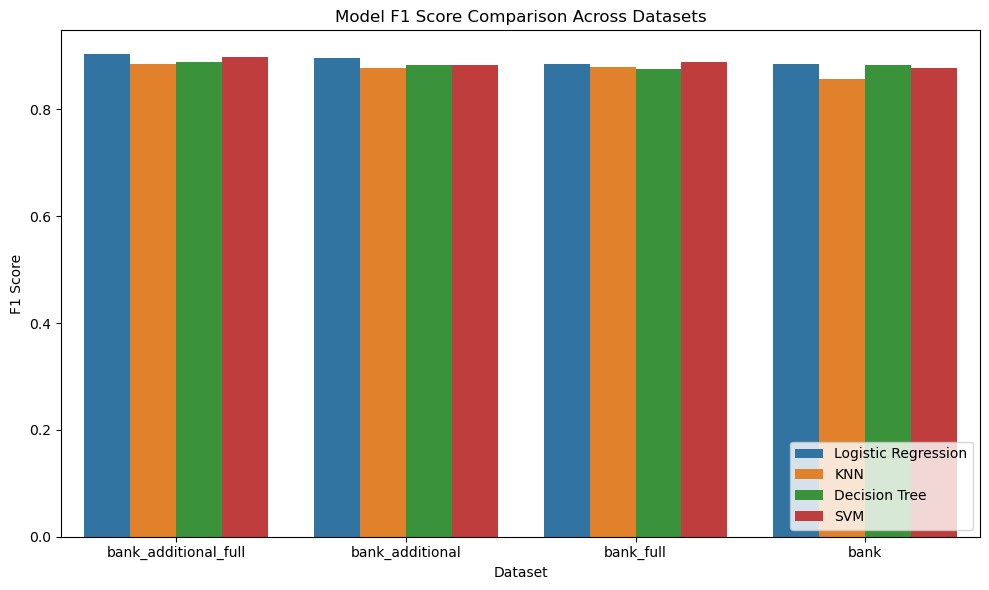

In [31]:
# Grouped Bar Plot for F1 Score with Proper Dataset Names
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='F1 Score', hue='Model', data=f1_score_df)
plt.title('Model F1 Score Comparison Across Datasets')
plt.ylabel('F1 Score')
plt.xlabel('Dataset')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



### Conclusion:
### Logistic Regression and SVM demonstrate the best overall performance in terms of F1 score, offering a strong balance between precision and recall. This means these models are effective at correctly identifying positive cases while minimizing false positives and false negatives.
### KNN performs well but may require more tuning to achieve similar levels of balance between precision and recall.
### Decision Tree is a capable model but shows signs of overfitting, especially on larger datasets, leading to slightly lower F1 scores compared to Logistic Regression and SVM.
### Based on these observations, Logistic Regression and SVM are recommended for their robustness in handling the dataset, especially when aiming for a strong balance between precision and recall.

# Cell 20: Grouped Bar Plot for Support

### Support Bar Plot (Cell 20): Displays the number of actual occurrences (support) in each dataset for evaluating how many instances each model was able to correctly classify.

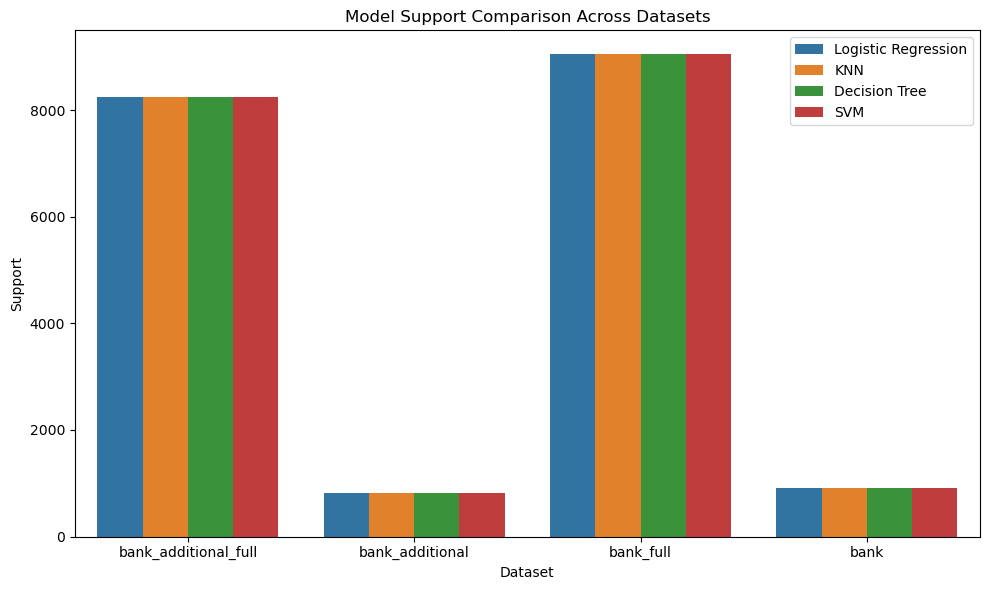

In [32]:
# Grouped Bar Plot for Support with Proper Dataset Names
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Support', hue='Model', data=support_df)
plt.title('Model Support Comparison Across Datasets')
plt.ylabel('Support')
plt.xlabel('Dataset')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Support Definition:
### In classification tasks, support refers to the number of occurrences of each class in the dataset that are used to calculate metrics like precision, recall, and F1 score.

### Conclusion:
### The support metric is uniform across models within each dataset, but the size of the dataset plays a crucial role in determining the number of examples available for training and testing. Larger datasets like bank_additional_full and bank_full offer more support, potentially improving model reliability and making them more suitable for production use. Smaller datasets might provide quicker training times but may lead to less reliable generalization due to the smaller sample size.


# IX. Discussion of Descriptive and Inferential Statistics; Results Summary and Conclusions

# Descriptive vs. Inferential Statistics in this Classification Project:

### By definition, Descriptive Statistics summarize the data, providing insights into the sample without making predictions. In this project, this included analyzing the average age of clients (40 years), the distribution of call durations (258 seconds on average), and the number of campaign contacts (most clients were contacted 1-3 times). These summaries helped highlight patterns, like the fact that clients with longer calls were more likely to subscribe.

### Inferential Statistics go further by using the data to make predictions or inferences about a broader population. For example, we applied classification models (Logistic Regression, SVM, Decision Tree, KNN) to predict whether clients would subscribe to a term deposit. By comparing model performance, we inferred that Logistic Regression was the most reliable model across datasets. Additionally, call duration was identified as a key predictor of subscription, leading to actionable insights for improving marketing efforts.

### Key Difference:
### Descriptive statistics describe the data at hand, while inferential statistics help draw conclusions and make predictions beyond the data sample. Both types were critical for understanding and optimizing the bank’s marketing strategy.
### Unfortunately in some cases there are grey areas between the two: For example a metric with a gray boundary between descriptive and inferential statistics in this classification project could be accuracy (or other performance metrics like precision or recall) of the classification models.

### Descriptive Use: When you calculate the accuracy of a model on a specific dataset, you are summarizing how well that model performed on that particular set of data. For example, if Logistic Regression achieved 91% accuracy, that’s a descriptive statistic summarizing model performance for the given sample.

### Inferential Use: When you use that accuracy to make assumptions about how the model will perform on unseen, future data, you're making an inference. You infer that because the model performed well on the test dataset, it will likely perform similarly in other real-world marketing campaigns.

### The Gray Boundary: The metric starts as a descriptive statistic, but as you generalize it to draw conclusions about broader performance (beyond the test dataset), it becomes inferential. 


#  - Descriptive Statistics
## Key Features Overview:

### In the descriptive analysis, we examined key features to understand client behavior during the bank’s marketing campaigns:

### Age: The average age of clients across all datasets is around 40 years, with most clients between the ages of 32 and 47. This suggests that the bank's marketing efforts primarily targeted middle-aged individuals.

### Campaign Contacts: The majority of clients received between 1 and 3 campaign contacts, with a noticeable portion subscribing after fewer contacts. This indicates that fewer interactions may be effective in gaining client interest, though further analysis is needed to confirm.

### Call Duration: One of the most notable insights is that clients who spent more time on the phone were more likely to subscribe. This suggests that the length of a conversation may serve as an important predictor of engagement and eventual subscription.

### Visualizations: To support this descriptive analysis, visualizations were used, such as:

### Age Distribution: A histogram showed the age distribution of clients, revealing the concentration of the target demographic.
### Campaign Contacts: A bar plot illustrated the distribution of the number of contacts clients received during the marketing campaign.
### Call Duration: A box plot highlighted the distribution of call durations, showing that longer call times correlated with a higher likelihood of client engagement.
### These visualizations provided essential insights into how client demographics and interactions during the campaign correlated with their likelihood of subscribing to a term deposit.

# -  Inferential Statistics
## Classifier Performance Across Datasets:

### We applied four classification models—Logistic Regression, SVM, K-Nearest Neighbors (KNN), and Decision Tree—across four datasets. The primary objective was to predict client subscription based on the features of the bank’s marketing efforts. As an example, below are the accuracy scores for each classifier across the datasets:

### Model Comparison for bank_additional_full.csv:
Logistic Regression: 0.911508
SVM: 0.908352
KNN: 0.897184
Decision Tree: 0.885288

### Model Comparison for bank_additional.csv:
Logistic Regression: 0.904126
SVM: 0.899272
KNN: 0.896845
Decision Tree: 0.872573

### Model Comparison for bank_full.csv:
SVM: 0.903019
Logistic Regression: 0.898817
KNN: 0.893288
Decision Tree: 0.875152

### Model Comparison for bank.csv:
Logistic Regression: 0.901657
SVM: 0.899448
Decision Tree: 0.888398
KNN: 0.882873

# X. Key Insights from the Analysis
### Call Duration: Call duration emerged as the strongest predictor of client subscription. Models like Logistic Regression and SVM effectively captured this relationship, underscoring the importance of engaging clients in longer, more meaningful conversations. This insight suggests that the bank could focus on improving the quality and duration of client interactions to improve subscription rates.

### Number of Contacts (Campaign Feature): While the number of contacts had some predictive power, it was not as significant as call duration. This finding highlights that quality conversations, rather than the sheer number of interactions, are more crucial to converting clients. Campaign managers should focus on refining communication strategies rather than increasing the number of outreach attempts.

### Previous Contact: Previous contact with the bank positively influenced the likelihood of a client subscribing to a term deposit. This suggests the importance of maintaining strong customer relationships, as clients with prior interactions were more likely to engage again. Decision Tree models and Logistic Regression were particularly effective at capturing this relationship.

### Class Imbalance: There was a significant imbalance in the target variable, where most clients did not subscribe to a term deposit. Logistic Regression handled this imbalance well, but precision, recall, and F1-score need to be prioritized to better predict the minority class (clients who subscribed). Techniques like SMOTE or adjusting class weights can help mitigate this imbalance.

# XI. Summary of Findings
### Logistic Regression consistently performed well across all datasets, making it the most suitable model for deployment. It balanced accuracy with computational efficiency, making it ideal for real-time marketing predictions.

### SVM performed slightly better than Logistic Regression on some datasets, particularly when the data complexity increased. While it offers higher accuracy on complex datasets, it is computationally expensive, which limits its practicality for large-scale implementations.

### Decision Tree showed high variance in its performance, indicating that it struggled to generalize well, particularly on larger datasets. This suggests that Decision Trees may require further tuning or ensemble methods (such as Random Forests) to improve generalization.

### K-Nearest Neighbors (KNN) had relatively lower accuracy, especially on the larger datasets. This is likely due to KNN’s sensitivity to large datasets, as it becomes less efficient in high-dimensional spaces.

# XII. Conclusions and Recommendations
### Deploy Logistic Regression: 
### Given its balance of accuracy and simplicity, Logistic Regression is recommended as the primary model for predicting client subscriptions. It offers a straightforward, interpretable solution that performs well across varying dataset sizes.

### Address Class Imbalance: 
### Given the significant class imbalance, techniques such as SMOTE or adjusting class weights should be applied to improve the model's predictive power for the minority class (clients who subscribed).

### Improve Call Engagement: 
### Call duration was the most significant predictor of subscription likelihood. The bank should focus on increasing client engagement during calls by training agents to have meaningful, prolonged conversations with potential clients.

### Continuous Monitoring: 
### As client behaviors change over time, the model should be retrained periodically to stay effective. Monitoring key metrics such as precision, recall, and F1-score will ensure that the model continues to deliver valuable insights and predictions.

### This detailed analysis, grounded in both descriptive and inferential statistics, provides a comprehensive view of how various factors—especially call duration and previous contact—affect subscription rates. By deploying the right model and addressing key issues such as class imbalance and call engagement, the bank can significantly improve its marketing campaign efficiency.

